In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,NaN,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,NaN,47,57,44
4,male,group C,some college,standard,NaN,76,78,75


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        358 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
data.isnull().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [33]:
data = data.drop(['race/ethnicity','test preparation course'],axis=1)

In [34]:
data

,gender,parental level of education,lunch,math score,reading score,writing score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75
...,...,...,...,...,...,...
995,female,master's degree,standard,88,99,95
996,male,high school,free/reduced,62,55,55
997,female,high school,free/reduced,59,71,65
998,female,some college,standard,68,78,77


In [38]:
object_dtypes = data.select_dtypes(include=['object'])
print(object_dtypes)

le = preprocessing.LabelEncoder()

for i in range (object_dtypes.shape[1]):
    object_dtypes.iloc[:,i] = le.fit_transform(object_dtypes.iloc[:,1])
    
print(object_dtypes)

     gender parental level of education         lunch
0    female           bachelor's degree      standard
1    female                some college      standard
2    female             master's degree      standard
3      male          associate's degree  free/reduced
4      male                some college      standard
..      ...                         ...           ...
995  female             master's degree      standard
996    male                 high school  free/reduced
997  female                 high school  free/reduced
998  female                some college      standard
999  female                some college  free/reduced

[1000 rows x 3 columns]
     gender  parental level of education  lunch
0         1                            1      1
1         4                            4      4
2         3                            3      3
3         0                            0      0
4         4                            4      4
..      ...                          ..

In [43]:
num_dtypes = data.select_dtypes(exclude=['object'])

data = pd.concat([object_dtypes,num_dtypes] , axis=1)
print(data)

     gender  parental level of education  ...  reading score  writing score
0         1                            1  ...             72             74
1         4                            4  ...             90             88
2         3                            3  ...             95             93
3         0                            0  ...             57             44
4         4                            4  ...             78             75
..      ...                          ...  ...            ...            ...
995       3                            3  ...             99             95
996       2                            2  ...             55             55
997       2                            2  ...             71             65
998       4                            4  ...             78             77
999       4                            4  ...             86             86

[1000 rows x 6 columns]


                               gender  ...  writing score
gender                       1.000000  ...      -0.084299
parental level of education  1.000000  ...      -0.084299
lunch                        1.000000  ...      -0.084299
math score                  -0.068279  ...       0.802642
reading score               -0.072444  ...       0.954598
writing score               -0.084299  ...       1.000000

[6 rows x 6 columns]


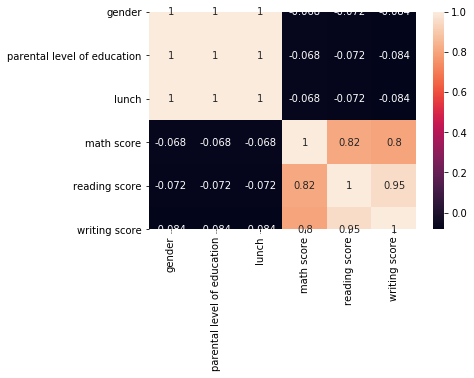

In [46]:
c = data.corr()
print(c)
sns.heatmap(c, annot= True)